<a href="https://colab.research.google.com/github/Sarav-ai/Priniciple-of-data-science/blob/main/Deep_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1, Loss: 0.0269
Epoch 2, Loss: 0.0152
Epoch 3, Loss: 0.0125
Epoch 4, Loss: 0.0111
Epoch 5, Loss: 0.0100
Epoch 6, Loss: 0.0091
Epoch 7, Loss: 0.0082
Epoch 8, Loss: 0.0073
Epoch 9, Loss: 0.0071
Epoch 10, Loss: 0.0066


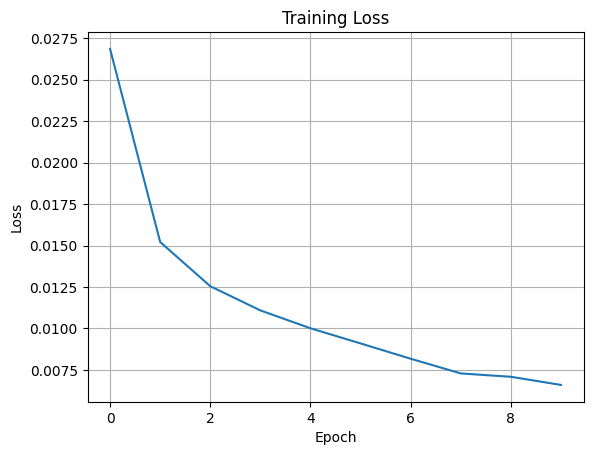

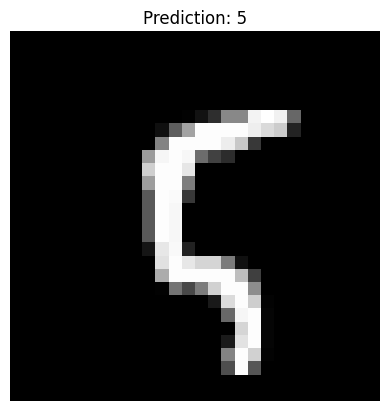

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
(X_train, y_train), (_, _) = mnist.load_data()
X_train = X_train.reshape(-1, 784) / 255.0
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
input_size, hidden_size, output_size = 784, 64, 10
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))
sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_deriv = lambda x: x * (1 - x)
loss_fn = lambda y, y_hat: -np.mean(y * np.log(y_hat + 1e-8))
epochs, lr = 10, 0.1
losses = []
for epoch in range(epochs):
    total_loss = 0
    for i in range(X_train.shape[0]):
        x = X_train[i:i+1]
        y = y_train[i:i+1]
        z1 = x @ W1 + b1
        a1 = sigmoid(z1)
        z2 = a1 @ W2 + b2
        a2 = sigmoid(z2)
        loss = loss_fn(y, a2)
        total_loss += loss
        dz2 = a2 - y
        dW2 = a1.T @ dz2
        db2 = dz2
        dz1 = (dz2 @ W2.T) * sigmoid_deriv(a1)
        dW1 = x.T @ dz1
        db1 = dz1
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1
    losses.append(total_loss / X_train.shape[0])
    print(f"Epoch {epoch+1}, Loss: {losses[-1]:.4f}")
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
def predict(img):
    img = img.reshape(1, 784) / 255.0
    a1 = sigmoid(img @ W1 + b1)
    a2 = sigmoid(a1 @ W2 + b2)
    return np.argmax(a2)
idx = 100
plt.imshow(X_train[idx].reshape(28, 28), cmap='gray')
plt.title(f"Prediction: {predict(X_train[idx])}")
plt.axis('off')+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++------+
plt.show()